In [20]:
import os
import numpy as np
# https://www.gushiciku.cn/dl/0prAT/zh-tw
from nibabel.testing import data_path
import nibabel as nib
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [21]:
# data set from Medical Segmentation Decathlon - Task 6 Lung -- https://drive.google.com/drive/folders/1HqEgzS8BV2c7xYNrZdEAnrHk7osJJ--2
# http://medicaldecathlon.com/

img = nib.load('/Users/eileenwang/Downloads/Task06_Lung/imagesTr/lung_001.nii.gz')
groudTruth = nib.load("/Users/eileenwang/Downloads/Task06_Lung/labelsTr/lung_001.nii.gz")
print(img.shape, groudTruth.shape)


(512, 512, 304) (512, 512, 304)


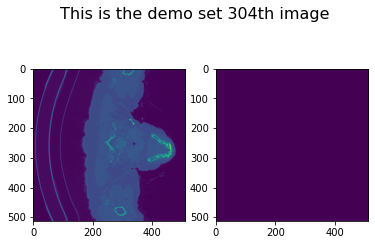

In [22]:
for i in range(304):
    fig, ax = plt.subplots(1,2)
    ax[0].imshow(img.dataobj[:,:,i])
    ax[1].imshow(groudTruth.dataobj[:,:,i])
    fig.suptitle(f'This is the demo set {i+1}th image', fontsize=16)
    plt.show()
    clear_output(wait  = True)

In [ ]:
# https://github.com/Ola-Vish/lung-tumor-segmentation